In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tslearn as ts
import numpy as np

In [2]:
house1_power_blk2 = pd.read_csv('data/house1_power_blk2_labels.zip', index_col='datetime').dropna()
house1_power_blk2.index = pd.to_datetime(house1_power_blk2.index)
house1_power_blk2 = house1_power_blk2.asfreq('s')
#house1_power_blk2 = house1_power_blk2.loc['2016-03-06 00:00:00':'2016-04-06 00:00:00']
#house1_power_blk2 = house1_power_blk2.resample('10s').nearest()
house1_power_blk2.head()

,mains,activity
datetime,,
2016-03-06 00:00:00,473.0,0.0
2016-03-06 00:00:01,474.0,0.0
2016-03-06 00:00:02,476.0,0.0
2016-03-06 00:00:03,476.0,0.0
2016-03-06 00:00:04,475.0,0.0


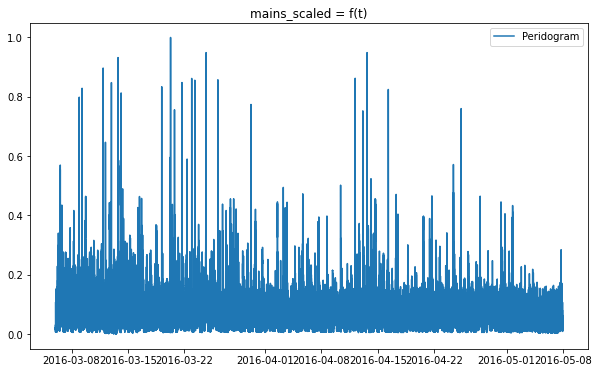

In [3]:
from sklearn.preprocessing import MinMaxScaler

house1_power_blk2['mains_scaled'] = MinMaxScaler().fit_transform(house1_power_blk2['mains'].values.reshape(-1,1))
house1_power_blk2['diff_scaled'] = MinMaxScaler().fit_transform(house1_power_blk2['mains'].diff(1).values.reshape(-1,1))

plt.figure(figsize=(10,6))
plt.plot(house1_power_blk2['mains_scaled'], label='Peridogram');
plt.legend()
plt.title('mains_scaled = f(t)')
plt.show();

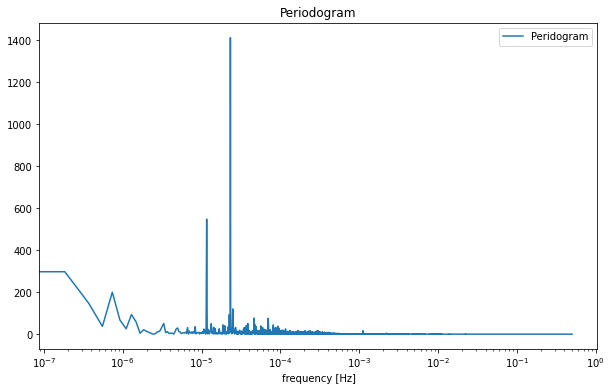

In [4]:
from scipy.signal import periodogram

f, p_den = periodogram(house1_power_blk2['mains_scaled'].dropna(), pd.Timedelta(house1_power_blk2.index.freq).seconds)

plt.figure(figsize=(10,6))
#plt.semilogy(f, p_den);
plt.plot(f, p_den, label='Peridogram');
plt.xscale('log')
plt.xlabel('frequency [Hz]')
plt.legend()
plt.title('Periodogram')
plt.show();

In [12]:
idx_max = np.argsort(-p_den)[:10]
freq = pd.DataFrame({'amplitude': p_den[idx_max], 'fréquence (s)': f[idx_max]})
freq['fréquence (jours)'] = 1/(freq['fréquence (s)']*60*60*24)
freq

,amplitude,fréquence (s),fréquence (jours)
0,1412.838575,2.316356e-05,0.499667
1,548.169563,1.158178e-05,0.999335
2,297.585273,1.838378e-07,62.958090
3,200.055717,7.353510e-07,15.739523
4,148.464287,3.676755e-07,31.479045
5,120.346876,2.481810e-05,0.466356
6,118.801848,2.334740e-05,0.495733
7,93.491592,2.242821e-05,0.516050
8,93.307990,1.286864e-06,8.994013
9,76.967177,4.632711e-05,0.249834


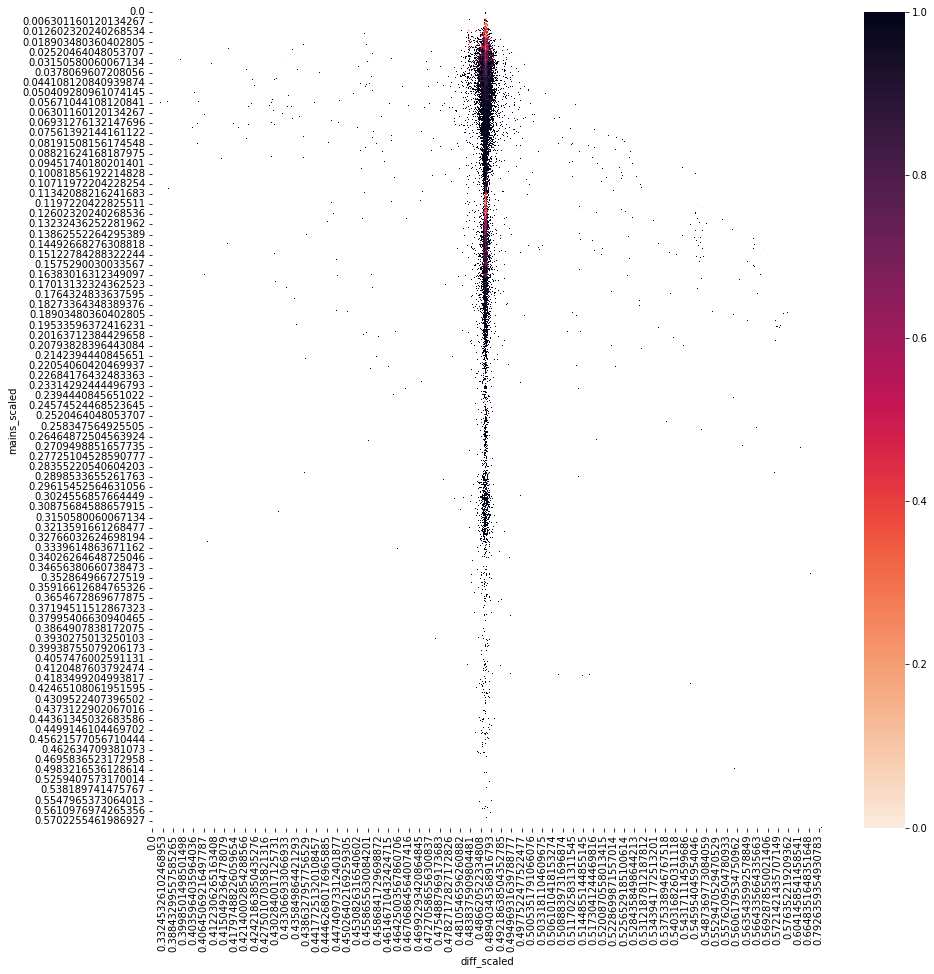

In [4]:
plt.figure(figsize=(15,15))
sns.heatmap(pd.pivot_table(house1_power_blk2, values='activity', index='mains_scaled', columns='diff_scaled'), cmap=sns.cm.rocket_r);

In [13]:
house1_power_blk2['diff_1d_scaled'] = MinMaxScaler().fit_transform(house1_power_blk2['mains'].diff(1/freq['fréquence (s)'][0]).values.reshape(-1,1))
house1_power_blk2['diff_2d_scaled'] = MinMaxScaler().fit_transform(house1_power_blk2['mains'].diff(1/freq['fréquence (s)'][1]).values.reshape(-1,1))

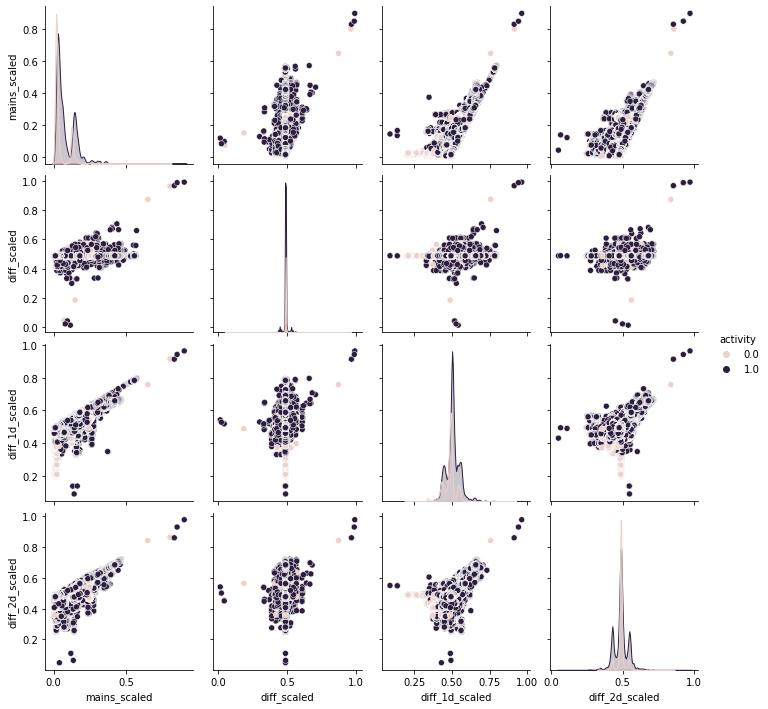

In [14]:
sns.pairplot(house1_power_blk2[['mains_scaled', 'diff_scaled', 'diff_1d_scaled', 'diff_2d_scaled', 'activity']].loc['2016-03-06 00:00:00':'2016-03-13 00:00:00'], hue='activity')